## The goal is to train a multilinear regression model to understand the impact of porosity, matrix permeability, acoustic impedance, brittleness ratio, TOC, virtinite Reflectance on the production performance.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

%matplotlib inline

In [36]:
sns.set_style('darkgrid')

In [37]:
data=pd.read_csv('Chapter5_Geologic_DataSet.csv')
data

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121
...,...,...,...,...,...,...,...
195,8.365,313,3.267,80.616,3.20,1.648,44.622765
196,12.593,987,3.718,53.184,3.92,1.664,64.961047
197,8.484,227,3.872,68.484,0.21,1.384,39.543047
198,10.885,448,2.728,69.900,7.56,1.880,59.004091


In [38]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Porosity (%),200.0,10.493805,2.079824,4.585000,9.03875,10.549000,12.181750,16.485000
Matrix Perm (nd),200.0,433.075000,173.101415,113.000000,312.25000,403.500000,528.750000,987.000000
Acoustic impedance (kg/m2s*10^6),200.0,3.265735,0.623574,1.408000,2.80225,3.250500,3.679500,5.093000
Brittleness Ratio,200.0,57.794340,16.955346,13.128000,45.30600,59.412000,69.915000,101.196000
TOC (%),200.0,3.970700,1.907119,0.100000,2.47000,4.120000,5.400000,8.720000
Vitrinite Reflectance (%),200.0,1.571440,0.240662,0.744000,1.41600,1.568000,1.714000,2.296000
Aroot(K),200.0,50.000000,11.505310,24.437856,41.96103,49.692285,58.986667,77.270733


In [39]:
data.any()

Porosity (%)                        True
Matrix Perm (nd)                    True
Acoustic impedance (kg/m2s*10^6)    True
Brittleness Ratio                   True
TOC (%)                             True
Vitrinite Reflectance (%)           True
Aroot(K)                            True
dtype: bool

In [6]:
type(data)

pandas.core.frame.DataFrame

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

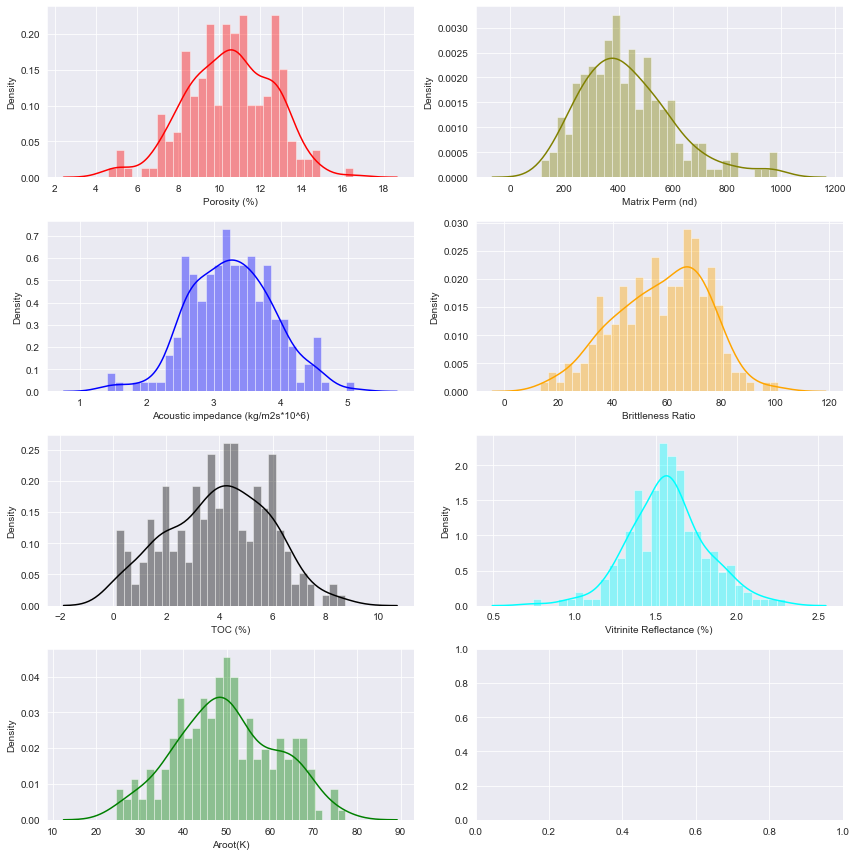

In [7]:
#visualize the data through seaborn subplots
f, axes = plt.subplots(4, 2,figsize=[12,12])
sns.distplot(data['Porosity (%)'],bins=30,kde=bool,color='red',ax=axes[0,0])
sns.distplot(data['Matrix Perm (nd)'],bins=30,kde=bool,color='olive',ax=axes[0,1])
sns.distplot(data['Acoustic impedance (kg/m2s*10^6)'],bins=30,kde=bool,color='blue',ax=axes[1,0])
sns.distplot(data['Brittleness Ratio'],bins=30,kde=bool,color='orange',ax=axes[1,1])
sns.distplot(data['TOC (%)'],bins=30,kde=bool,color='black',ax=axes[2,0])
sns.distplot(data['Vitrinite Reflectance (%)'],bins=30,kde=bool,color='cyan',ax=axes[2,1])
sns.distplot(data['Aroot(K)'],bins=30,kde=bool,color='green',ax=axes[3,0])
plt.tight_layout()
plt.show()

<AxesSubplot:>

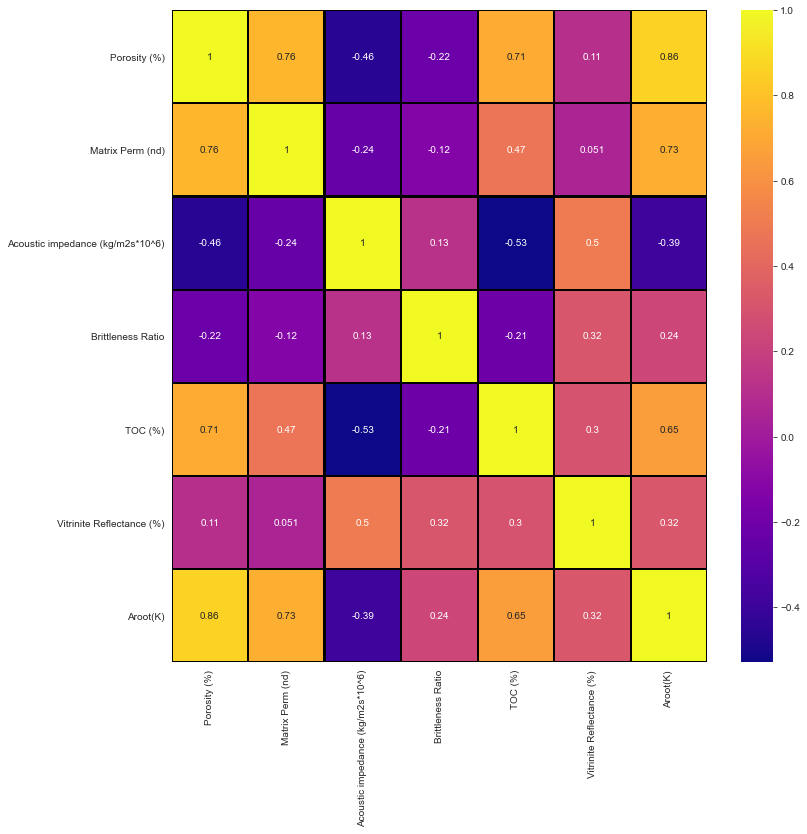

In [8]:
plt.figure(figsize=[12,12])
sns.heatmap(data.corr(),linewidth=1.3,linecolor='black',cmap='plasma',annot=True,)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

<AxesSubplot:xlabel='Aroot(K)'>

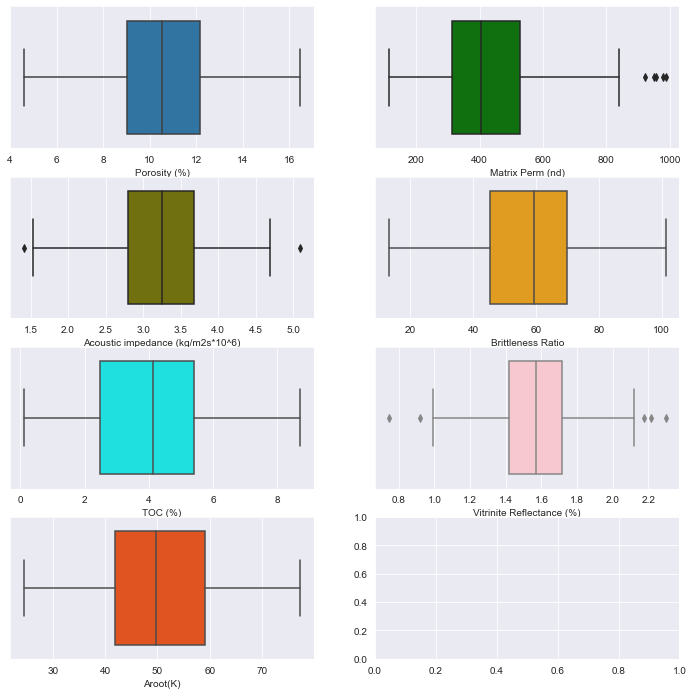

In [43]:
f, axes = plt.subplots(4,2,figsize=[12,12])
sns.boxplot(data['Porosity (%)'],ax=axes[0,0])
sns.boxplot(data['Matrix Perm (nd)'],ax=axes[0,1],color='green')
sns.boxplot(data['Acoustic impedance (kg/m2s*10^6)'],ax=axes[1,0],color='olive')
sns.boxplot(data['Brittleness Ratio'],ax=axes[1,1],color='orange')
sns.boxplot(data['TOC (%)'],ax=axes[2,0],color='cyan')
sns.boxplot(data['Vitrinite Reflectance (%)'],ax=axes[2,1],color='pink')
sns.boxplot(data['Aroot(K)'],ax=axes[3,0],color='orangered')

In [9]:
data.skew()

Porosity (%)                       -0.203264
Matrix Perm (nd)                    0.860254
Acoustic impedance (kg/m2s*10^6)    0.003412
Brittleness Ratio                  -0.270031
TOC (%)                            -0.090270
Vitrinite Reflectance (%)           0.042187
Aroot(K)                            0.067910
dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anacond

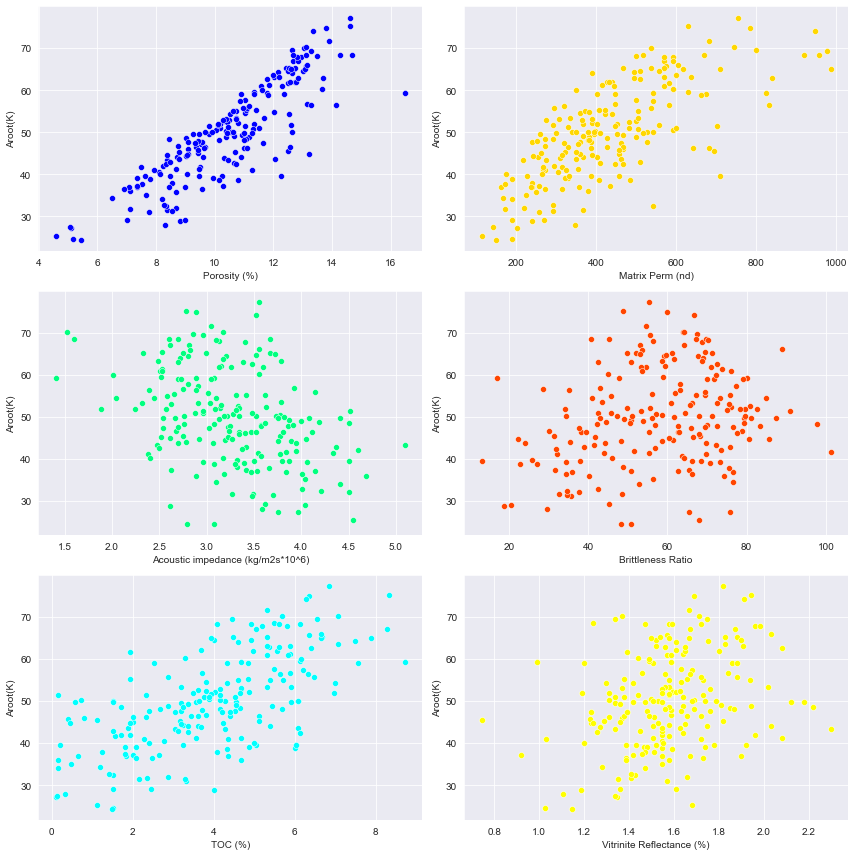

In [10]:
f, axes = plt.subplots(3, 2,figsize=[12,12])
sns.scatterplot(data['Porosity (%)'],data['Aroot(K)'],color='blue',ax=axes[0,0])
sns.scatterplot(data['Matrix Perm (nd)'],data['Aroot(K)'],color='gold',ax=axes[0,1])
sns.scatterplot(data['Acoustic impedance (kg/m2s*10^6)'],data['Aroot(K)'],color='springgreen',ax=axes[1,0])
sns.scatterplot(data['Brittleness Ratio'],data['Aroot(K)'],color='orangered',ax=axes[1,1])
sns.scatterplot(data['TOC (%)'],data['Aroot(K)'],color='aqua',ax=axes[2,0])
sns.scatterplot(data['Vitrinite Reflectance (%)'],data['Aroot(K)'],color='yellow',ax=axes[2,1])
plt.tight_layout()
plt.show()

In [11]:
data.drop(['Matrix Perm (nd)'],axis=1,inplace=True)


In [12]:
#data
data.skew()

Porosity (%)                       -0.203264
Acoustic impedance (kg/m2s*10^6)    0.003412
Brittleness Ratio                  -0.270031
TOC (%)                            -0.090270
Vitrinite Reflectance (%)           0.042187
Aroot(K)                            0.067910
dtype: float64

sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [13]:
target=data['Aroot(K)']
feature=data.drop(['Aroot(K)'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=10)

In [14]:
len(x_train/len(feature))

160

In [15]:
regr=LinearRegression()
regr.fit(x_train,y_train)
print('intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=x_train.columns,columns=['coefficients'])

intercept -23.153506654241873


,coefficients
Porosity (%),4.894910
Acoustic impedance (kg/m2s*10^6),-1.011033
Brittleness Ratio,0.277872
TOC (%),0.398200
Vitrinite Reflectance (%),4.689788


In [16]:
print("R=squared value of training data:",regr.score(x_train,y_train))
print("R-squred value of test dat:",regr.score(x_test,y_test))

R=squared value of training data: 0.947366679724989
R-squred value of test dat: 0.934809531750444


In [17]:
x_incl_const=sm.add_constant(x_train)

In [18]:
model=sm.OLS(y_train,x_incl_const)
result=model.fit()
model_stat=result.summary() #we get the summary of whole model

In [19]:
pd.DataFrame({'coef':result.params,'p-values':round(result.pvalues)})

,coef,p-values
const,-23.153507,0.0
Porosity (%),4.894910,0.0
Acoustic impedance (kg/m2s*10^6),-1.011033,0.0
Brittleness Ratio,0.277872,0.0
TOC (%),0.398200,0.0
Vitrinite Reflectance (%),4.689788,0.0


In [20]:
predicted_value=regr.predict(x_test)
diff=predicted_value-y_test
rmse=np.mean(diff**2)

In [21]:
rmse

8.400820281777149

In [22]:
test_set_r2=r2_score(y_test,predicted_value)

print('Testing rˆ2:',round(test_set_r2,3))

Testing rˆ2: 0.935


### we found that here that the accuracy of model is good

In [23]:
print(model_stat)

                            OLS Regression Results                            
Dep. Variable:               Aroot(K)   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     554.4
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.66e-96
Time:                        21:08:29   Log-Likelihood:                -382.10
No. Observations:                 160   AIC:                             776.2
Df Residuals:                     154   BIC:                             794.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Aroot(K)', ylabel='Density'>

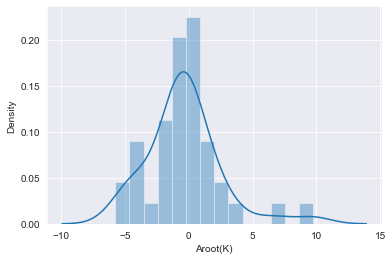

In [24]:
sns.distplot(diff)